In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('instagram_reach.csv')

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.shape

(100, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,8.94,6.639064,0.0,4.00,8.0,12.25,26.0
S.No,100.0,16.24,7.384286,1.0,10.75,16.5,22.25,30.0
Followers,100.0,961.96,1014.625670,11.0,252.75,612.0,1197.00,4496.0
Likes,100.0,46.48,55.086980,8.0,19.00,29.0,46.00,349.0


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


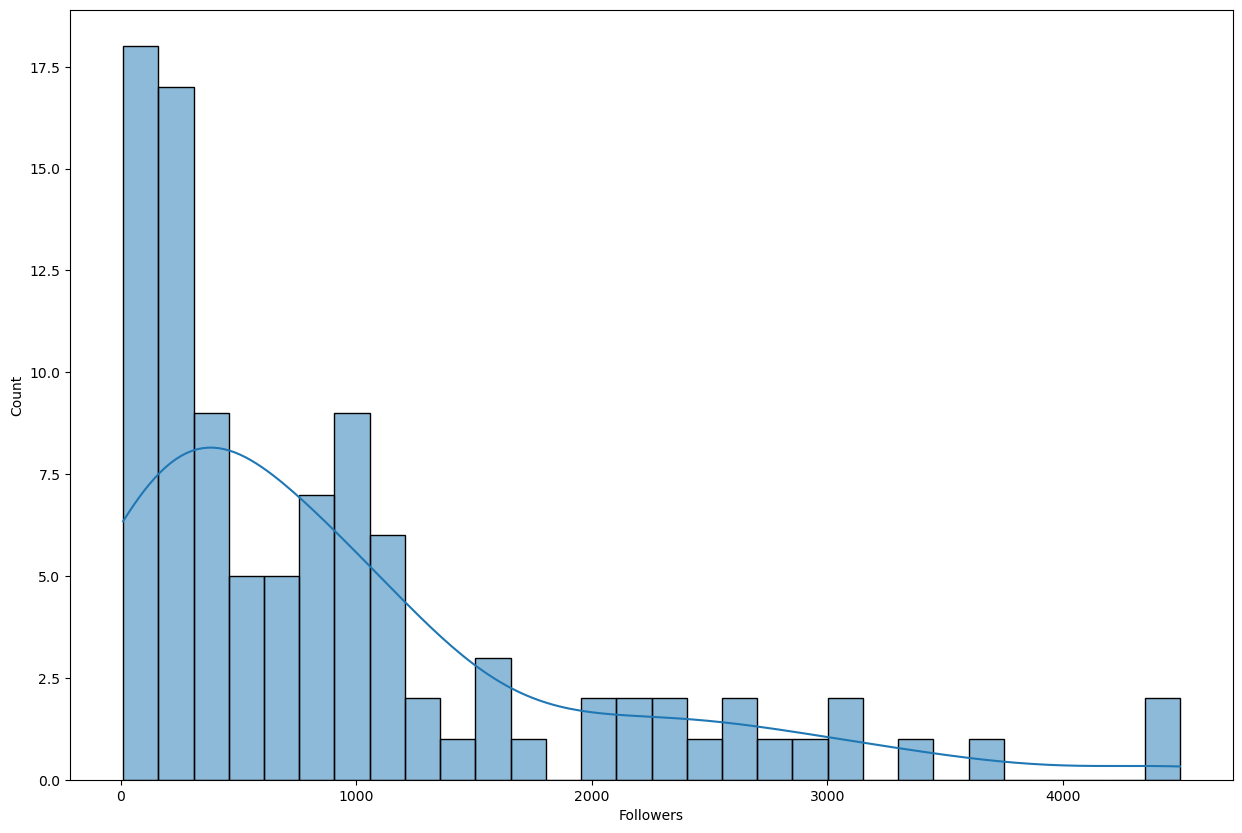

In [8]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='Followers', bins=30, kde=True)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['USERNAME']=le.fit_transform(df['USERNAME'])
df['Caption']=le.fit_transform(df['Caption'])
df['Hashtags']=le.fit_transform(df['Hashtags'])

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Anaconda\Lib\site-packages\sklear

In [10]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,64,86,1600,17,11 hours,139
1,1,2,29,82,880,97,2 hours,23
2,2,3,3,13,255,87,2 hours,25
3,3,4,71,89,340,65,3 hours,49
4,4,5,23,30,304,64,3 hours,30


In [11]:
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(int)

In [12]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,64,86,1600,17,11,139
1,1,2,29,82,880,97,2,23
2,2,3,3,13,255,87,2,25
3,3,4,71,89,340,65,3,49
4,4,5,23,30,304,64,3,30


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         100 non-null    int64
 1   S.No               100 non-null    int64
 2   USERNAME           100 non-null    int32
 3   Caption            100 non-null    int32
 4   Followers          100 non-null    int64
 5   Hashtags           100 non-null    int32
 6   Time since posted  100 non-null    int32
 7   Likes              100 non-null    int64
dtypes: int32(4), int64(4)
memory usage: 4.8 KB


In [14]:
X=df.drop(labels=['S.No','Time since posted','Likes'],axis=1)

In [15]:
X

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags
0,0,64,86,1600,17
1,1,29,82,880,97
2,2,3,13,255,87
3,3,71,89,340,65
4,4,23,30,304,64
...,...,...,...,...,...
95,8,63,6,614,29
96,9,30,24,450,88
97,10,31,83,182,36
98,11,55,85,2039,62


In [16]:
y = df[['Time since posted','Likes']]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags
55,16,13,81,3448,28
88,1,20,58,1158,56
26,26,22,2,265,20
42,3,42,71,273,25
69,7,40,50,1003,55
...,...,...,...,...,...
60,21,81,80,145,13
71,9,61,26,383,37
14,14,9,27,2904,34
92,5,21,67,106,42


In [43]:
y_train

,Time since posted,Likes
55,24,349
88,2,29
26,2,25
42,2,41
69,2,40
...,...,...
60,2,16
71,2,50
14,3,28
92,2,12


In [44]:
X_test

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags
83,10,10,15,91,84
53,14,38,54,87,3
70,8,83,37,1200,86
45,6,34,35,122,60
44,5,49,20,118,38
39,0,64,4,1600,18
22,22,70,91,1041,50
80,7,66,92,140,79
10,10,27,77,149,27
0,0,64,86,1600,17


In [45]:
y_test

,Time since posted,Likes
83,3,14
53,4,24
70,2,21
45,2,31
44,2,16
39,14,136
22,2,20
80,2,28
10,7,31
0,11,139


In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

In [48]:
def evaluate_model(true,predict):
    r2 = r2_score(true,predict)
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
    
    return r2,mae,mse

In [49]:
models = {
    'SVR':SVR(),
    'Linearregression':LinearRegression(),
    'DT':DecisionTreeRegressor(),
    'Randomforest':RandomForestRegressor()
}

In [50]:
for i in range(len(models)):
    model=list((models.values()))[i]
    print(model)

SVR()
LinearRegression()
DecisionTreeRegressor()
RandomForestRegressor()


In [ ]:
r2_list=[]
for i in range(len(models)):
    model=list(models.values())[i]
    
    model.fit(X_train_scaled,y_train)

    #make_prediction
    y_pred=model.predict(X_test_scaled)

    #this is for the validaiton
    R2,MAE,MSE=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    
    r2_list.append(R2)

    print("="*40)
    print("\n")